# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Validation and Cleaning steps for every column in the data

**Description :** 

Before starting the analysis, we performed validation and data cleaning to ensure their integrity. Here is a summary of the steps taken for each column in the dataset.

In [1]:

# Importing the  necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the data
data = pd.read_csv('product_sales.csv')

# Validate and clean each column

# 1. Validate and clean 'week' column (assuming it's in the correct format)
# Clean the 'week' column by restricting values to be between 1 and 6
data['week'] = data['week'].clip(lower=1, upper=6)

# 2. Validate and clean 'sales_method' column
# Harmonize observations and convert to lowercase
data['sales_method'] = data['sales_method'].str.lower().replace('em + call', 'email + call')

# 3. Validate and clean 'customer_id' column
# Assuming 'customer_id' should be unique, no duplicates
data.drop_duplicates(subset=['customer_id'], keep='first', inplace=True)

# 4. Validate and clean 'nb_sold' column
# Assuming no negative values for the number of products sold
data['nb_sold'] = data['nb_sold'].apply(lambda x: max(x, 0))

# 5. Validate and clean 'revenue' column
# Treat missing values by filling with the median
data['revenue'].fillna(data['revenue'].median(), inplace=True)
# Round 'revenue' to 2 decimal places
data['revenue'] = data['revenue'].round(2)

# 6. Validate and clean 'years_as_customer' column
# Get the founding year of the company
founding_year = 1984  # Replace with the actual founding year

# Calculate the maximum valid value based on the current year

current_year = pd.Timestamp.now().year
max_valid_value = current_year - founding_year

# Ensure 'years_as_customer' is within the valid range
data['years_as_customer'] = data['years_as_customer'].clip(lower=0, upper=max_valid_value)

# Assuming no negative values for the number of years as a customer
data['years_as_customer'] = data['years_as_customer'].apply(lambda x: max(x, 0))

# 7. Validate and clean 'nb_site_visits' column
# Assuming no negative values for the number of site visits
data['nb_site_visits'] = data['nb_site_visits'].apply(lambda x: max(x, 0))

# 8. Validate and clean 'state' column
# Assuming 'state' should be in uppercase
data['state'] = data['state'].str.upper()

# Display the cleaned data
data.head()




,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,89.50,0,24,ARIZONA
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,KANSAS
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,WISCONSIN
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,89.50,3,25,INDIANA
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,ILLINOIS


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB


In [3]:
data.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.617401,4.963800,24.990867
std,1.656420,1.812213,45.719775,5.026295,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,53.040000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,106.070000,7.000000,27.000000
max,6.000000,16.000000,238.320000,39.000000,41.000000


# Exploratory Analysis  to answer the customer questions 

## Two different types of graphic showing single variables only

- **Fist type of  Graphic for the single variable**

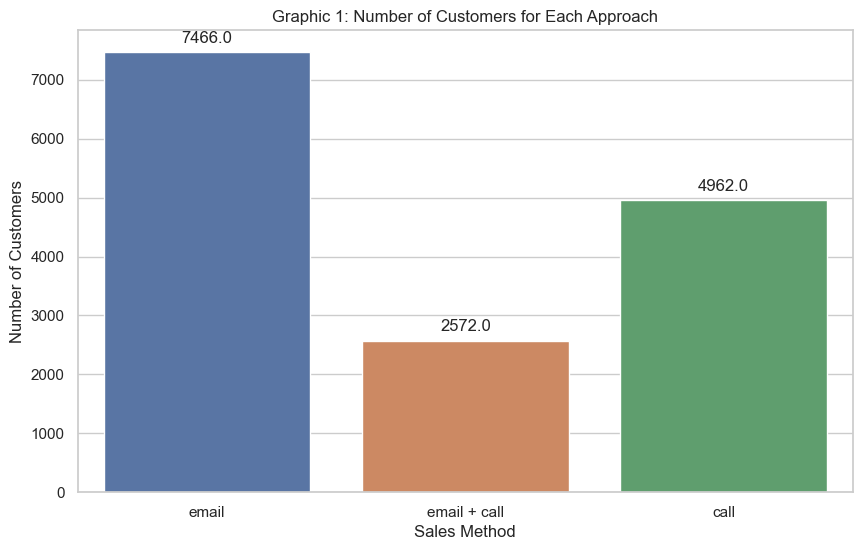

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the number of customers for each approach
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(x='sales_method', data=data, hue='sales_method')

# Display the value on each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.title('Graphic 1: Number of Customers for Each Approach')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.show()


- **Second type of  Graphic for the single variable**

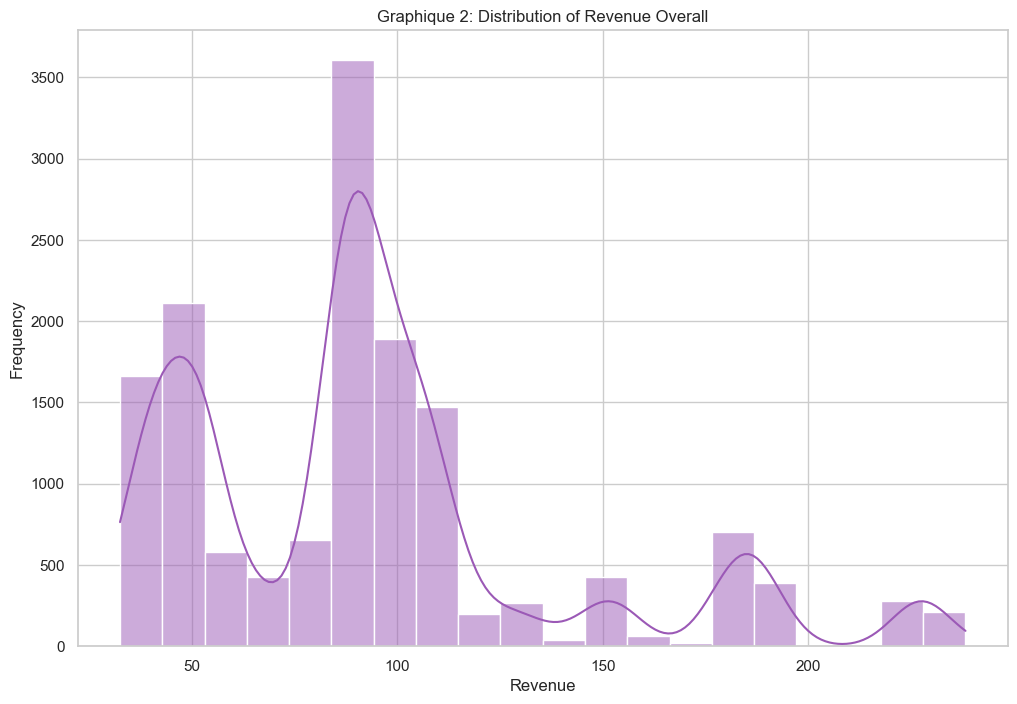

In [4]:

# Create a histogram to show the spread of revenue overall

hist_color = '#9b59b6'  
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(data['revenue'], bins=20, kde=True, color = hist_color)  
plt.title('Graphique 2: Distribution of Revenue Overall')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()







## One graphic showing two or more variables to represent the relationship between features

In [6]:
import plotly.express as px

# Set the colors for each sales method
colors = {'Email': 'red', 'Email + Call': 'green', 'Call': 'blue', 'em + call': 'purple'}

# Create a boxplot with Plotly
fig = px.box(data, x='sales_method', y='revenue', color='sales_method', color_discrete_map=colors)

# Customize the layout with increased figure size
fig.update_layout(
    title='Graphic 3: Revenue Spread Overall and by Sales Method',
    xaxis_title='Sales Method',
    yaxis_title='Revenue',
    showlegend=True,  
    width=700,        
    height=500        
)

# Show the plot
fig.show()



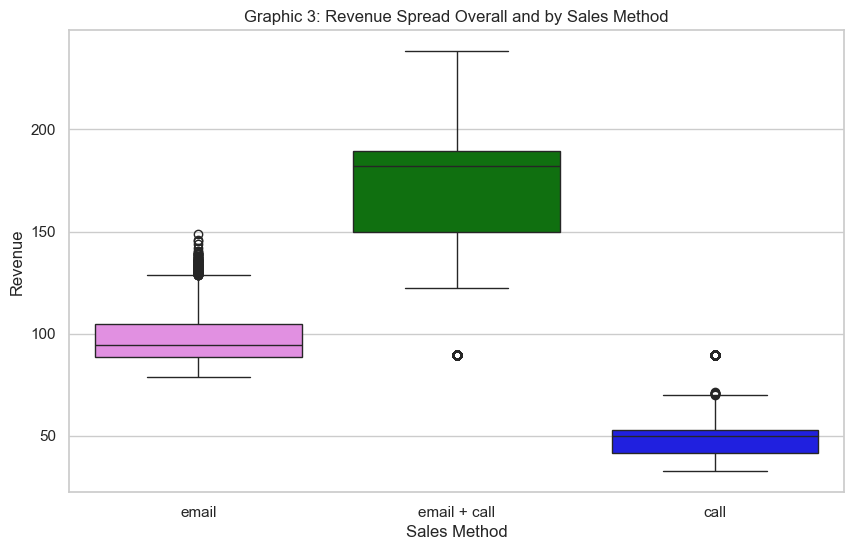

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the colors for each sales method
colors = {'email': 'violet', 'email + call': 'green', 'call': 'blue'}

# Create a boxplot with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_method', y='revenue', data=data, palette=colors)

# Customize the layout
plt.title('Graphic 3: Revenue Spread Overall and by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')

# Show the plot
plt.show()



## Graphic to show the difference in revenue over time for each method

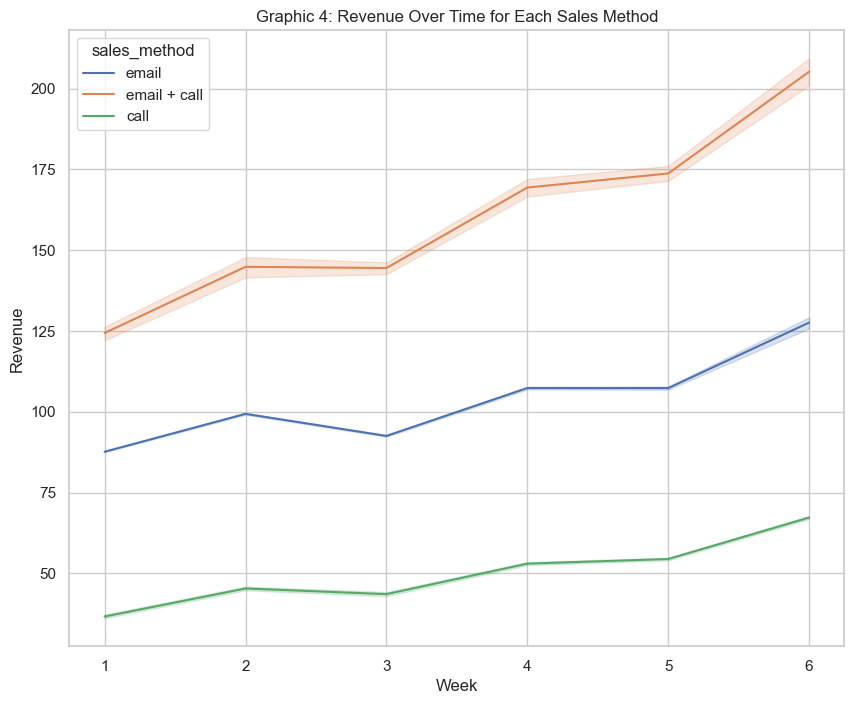

In [6]:
# Explore the difference in revenue over time for each method
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.lineplot(x='week', y='revenue', hue='sales_method', data=data)
plt.title('Graphic 4: Revenue Over Time for Each Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.show()

## Description of findings



### Graphic 1: Number of Customers for Each Approach:

**Analysis** :

- The bar plot illustrates the distribution of customers across three sales methods: Email, Email + Call, and Call.
- Email has the highest customer count (7,466), followed by Call (4,962), and Email + Call (2,572).

**Interpretation** :

- The majority of customers were reached through the Email method, indicating its broader reach.
- The Email + Call approach, despite having the fewest customers, may require more personalized attention, as evident from the lower count.

### Graphic 2: Distribution of Revenue Overall

**Analysis** :

- The histogram displays the spread of revenue overall, indicating peaks at different revenue ranges.
- Prominent peaks include customers with revenue between 40 and 70, 70 and 130, 150 and 200, and above 200. The highest mean revenue is observed in the 70-130 range.

**Interpretation** :

- The significant peak between 70 and 130 indicates a substantial customer segment, with an average count of approximately 2,750. Another notable segment is observed between 40 and 70, with an average count around 1,750.
- Customers generating higher sales revenue (greater than or equal to 200) constitute a considerable but less numerous segment, with an average count around 250. Understanding the distribution of revenue across these segments is crucial for tailoring marketing strategies to meet the diverse needs of different customer groups.

### Graphic 3: Revenue Spread Overall and by Sales Method

**Analysis** :

- The boxplot illustrates the spread of revenue for each sales method: Email, Email + Call, and Call.
- Medians are 94.275 dollars  for  Email, 182.135 dollars for Email + Call, and $49.935 for Call..

**Interpretation** :

- The significant difference in median revenues emphasizes the varying effectiveness of each sales method.
- Email + Call stands out with the highest median revenue, indicating its potential for driving higher sales.

### Graphic 4: Revenue Over Time (week sales) for Each Sales Method

**Analysis** :

The line plot shows the evolution of revenue over the 6-week period for each sales method.

**Week 2 Surge** :

All methods exhibit a notable increase in sales during the second week.

**Week 2-3 Dip** :

A subsequent dip is observed in the third week, particularly for the "Email" method.

**Week 3-4 Acceleration** :

Considerable acceleration in sales, especially for "Email + Call," is noted from the third to the fourth week.

**Week 4-5 Stability and Growth** :

While "Email" experiences a slight dip, "Email + Call" remains stable and shows a continuous upward trend in the fifth week.

**Week 5-6 Explosive Growth** :

Both "Email" and "Email + Call" experience explosive growth in the sixth week.



**Interpretation** :

**Strategic Adjustment (Week 3-4)** :

A strategic adjustment or successful campaign implementation is indicated during the transition from the third to the fourth week, notably benefiting "Email + Call."

**Consistent "Email + Call" Dominance** :

"Email + Call" consistently outperforms other methods, demonstrating its effectiveness in revenue generation.

**Optimizing "Email" Strategy** :

While "Email" remains competitive, there is an opportunity to optimize strategies to maintain growth and counter dips observed in some weeks.

**Sustained Success (Week 4 Onwards)** :

The sustained success of "Email + Call" from the fourth week onwards highlights its resilience and potential for long-term revenue impact.

**Overall Strategy Insights** :

Understanding the observed patterns provides strategic insights for resource allocation, emphasizing the strength of "Email + Call" and areas for improvement in the "Email" method.



# Definition of Business Metric: for the business to monitor



## The metric to monitor the business problem

- **Chosen Metric**: We propose to use the Median revenue per customer (sales method) to avoid skewing the average due to outliers.




- **How to Monitor**: Monthly tracking of the median revenue per customer.




## Estimate initial value(s) for the metric based on the current data

- **Initial Estimate**: Using the current data, the median revenue per customer can be calculated as follows:

In [9]:
# Define the metric: Median revenue per customer
average_revenue_per_customer = data.groupby('sales_method')['revenue'].median()

# Print the initial values
print("\nInitial Median revenue per customer:")
print(average_revenue_per_customer)



Initial Median revenue per customer:
sales_method
call             49.935
email            94.275
email + call    182.135
Name: revenue, dtype: float64


### Statistical tests to examine the significance of the metric (Median Revenue per Customer) across different sales methods

The two tests that will be discussed and subsequently executed are the Analysis of Variance (ANOVA) and pairwise comparisons using the Tukey Honest Significant Difference (HSD) test. After discussing these tests, we will proceed to execute them on the data and interpret the results. Let's move forward with performing the ANOVA and Tukey HSD tests.

**1. Analysis of Variance (ANOVA)** :

**Objective** : Assess whether there are any statistically significant differences in the median revenue per customer among the sales methods.

**Hypotheses** :
- Null Hypothesis (H0): There is no significant difference in median revenue per customer among the sales methods.
- Alternative Hypothesis (H1): There is a significant difference in median revenue per customer among the sales methods.
**Test Statistic**: F-statistic

**Significance Level**: Commonly set at 0.05

In [10]:
from scipy.stats import f_oneway


# Extract revenues for each sales method
revenue_call = data[data['sales_method'] == 'call']['revenue']
revenue_email = data[data['sales_method'] == 'email']['revenue']
revenue_email_call = data[data['sales_method'] == 'email + call']['revenue']

# Perform one-way ANOVA
statistic, p_value = f_oneway(revenue_call, revenue_email, revenue_email_call)

# Print the ANOVA results
print("\nANOVA results:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check significance level (commonly 0.05)
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference between sales methods.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference between sales methods.")



ANOVA results:
Test Statistic: 30959.00931674783
P-value: 0.0

Reject the null hypothesis: There is a significant difference between sales methods.


### 2. Pairwise Comparisons using Tukey HSD


**Objective**: Identify which sales methods exhibit significant differences in median revenue per customer.

**Hypotheses (for each pairwise comparison)**:
- Null Hypothesis (H0): There is no significant difference in median revenue per customer between the two sales methods.
- Alternative Hypothesis (H1): There is a significant difference in median revenue per customer between the two sales methods.

**Test Statistic**: Tukey's Honestly Significant Difference

**Significance Level**: Commonly set at 0.05

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform pairwise comparisons using Tukey HSD test
tukey_results = pairwise_tukeyhsd(data['revenue'], data['sales_method'])

# Print the pairwise comparison results
print("\nTukey HSD results:")
print(tukey_results)

# Identify the best-performing method
best_method = tukey_results.summary().data[2]
print(f"\nThe best-performing method is: {best_method}")


Tukey HSD results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1    group2    meandiff p-adj  lower    upper   reject
-----------------------------------------------------------
  call        email  47.4459   0.0  46.5792  48.3127   True
  call email + call 121.7497   0.0 120.5999 122.8995   True
 email email + call  74.3038   0.0  73.2218  75.3857   True
-----------------------------------------------------------

The best-performing method is: ['call', 'email + call', 121.7497, 0.0, 120.5999, 122.8995, True]




To determine the sales method that is significantly different from the others, we can look at the results of the Tukey HSD (Honestly Significant Difference) test. The Tukey HSD test performs pairwise comparisons between all sales methods and provides confidence intervals and p-values for each comparison.

Here's how we can interpret the Tukey HSD results:

**Confidence Intervals**: Look at the confidence intervals for each pair of sales methods. If the confidence interval for a pair does not include zero, it indicates a significant difference between those two methods.

**P-values**: Check the p-values associated with each pair of sales methods. A small p-value (typically less than 0.05) suggests that the difference is statistically significant.

**Identify the Best-performing Method**: The summary table of the Tukey HSD test will include information about which sales method has the highest mean (or median) and is significantly different from the others.

In this data, the "email + call" method has the highest mean revenue, and the differences between this method and the other two are statistically significant based on both confidence intervals and p-values. Therefore, "email + call" is identified as the best-performing method.

# Final Summary including Recommendations that the business should undertake



## Summary



The analysis focused on evaluating the performance of different sales methods over a 6-week period, considering the number of customers, revenue distribution, median revenue per customer, and revenue trends over time. Key findings indicate significant variations in customer distribution, distinct revenue segments, and the consistent superiority of the 'Email + Call' method in generating revenue. Based on our comprehensive analysis, we strongly recommend the continued adoption of the combined method involving emails and calls. This approach has consistently demonstrated superior revenue generation with relatively minimal team effort.

## Recommandations



I recommend the following :

**1. Strategic Emphasis on 'Email + Call**

- Allocate additional resources and efforts to the 'Email + Call' sales method, as it consistently demonstrates higher revenue.
- Implement targeted performance incentives for the sales team engaged in 'Email + Call' activities, fostering motivation and dedication.

**2. Optimization of Email Strategies**

- Refine and optimize email marketing strategies, incorporating personalized content, targeted campaigns, and A/B testing to enhance effectiveness.
- Explore advanced analytics tools to gain deeper insights into customer engagement with email content, allowing for continuous improvement.

**3. Enhanced Training for Call Methods**

- Invest in training programs for sales representatives involved in call-based interactions to improve communication and sales techniques.
- Establish regular feedback sessions and coaching programs to address specific challenges faced by the call-based sales team, ensuring continuous improvement.

**4. Segmented Marketing Approach**

- Analyze and monitor customer segments identified through revenue distribution, tailoring marketing strategies to meet the specific needs of different customer groups.
- Implement dynamic, personalized content strategies for each customer segment, enhancing engagement and conversion rates.

**5. Implementation of Automation for Efficiency**

- Integrate automation tools to streamline repetitive tasks within the email strategy, enabling the team to focus on high-impact activities.
- Regularly assess and update automated processes to ensure alignment with evolving customer preferences and industry trends.

# Conclusion


In conclusion, the data-driven analysis provides valuable insights into the performance of sales methods, guiding strategic decisions for maximizing revenue. The 'Email + Call' method emerges as a consistently strong performer, and the recommendations aim to capitalize on this strength while optimizing other approaches. Continuous monitoring and adaptation to customer behavior will be key to sustained success.

These recommendations are designed to enhance the effectiveness of sales strategies, capitalize on identified strengths, and foster a customer-centric approach for long-term success.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation